## RMS TITANIC: MACHINE LEARNING PROJECT TO PREDICT PASSENGER SURVIVAL

### INTRODUCTION

<br>On April 15th 1912, the RMS Titanic — the largest ship afloat at the time — struck an iceberg and sank in the North Atlantic Ocean during her maiden voyage, killing more than 1500 people who were on board. To this day, it remains the deadliest peacetime maritime disaster, providing inspiration for many works of fiction and non-fiction — including the 1997 Hollywood film, Titanic, starring Leonardo DiCaprio and Kate Winslet.<br> 
<br>It is important to note that we do not have a definitive number of the people who were aboard the Titanic, so all the numbers and details included in this project are estimates. That said, for the purposes of our project, it would suffice to have an estimate of the number of passengers and survivors on board, including some details about their sex, age, ticket class, port of embarkment, etc.<br>
<br>My primary aim here is to build a Machine Learning Model (ML) that can predict whether a passenger survived or not. But before I can do so, I will do the following:<br>

1. Import relevant libraries;
2. Import three separate datasets (Train, Test & Gender Submission);
3. Explore the datasets;
4. Clean & wrangle the datasets;
5. Build three ML models and train the training dataset on them; and finally,
6. Evaluate each to see which can best predict the probability of who survived. 

<br>I will end by stating what factors, I believe, played a significant role in the survival of some passengers but not others, bringing insights extracted from the data together with those gleaned from known historical facts about the RMS Titanic.<br>

### 1. IMPORT LIBRARIES

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

### 2. IMPORT TRAIN, TEST & GENDER-SUBMISSION DATASETS

In [85]:
gender_data = pd.read_csv('titanic_gender_submission.csv')
test_titanic = pd.read_csv('titanic_test.csv')
train_titanic = pd.read_csv('titanic_train.csv')

### 3. EXPLORE THE DATA

##### 3.1. Checking first 5 rows of gender_data, train & test

In [86]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [87]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 3.2. Insert 'Survival' column from 'gender-submission' into 'test' dataset as it's missing

In [89]:
test_titanic.insert(1, 'Survived', gender_data['Survived'])

##### 3.3. Train & Test datasets now have 12 columns each. Below is a description of each column:

1. Survived: 1 = survived, 0 = died
2. PassengerId: Unique ID per passenger 
3. Pclass: Ticket class (1=1st, 2=2nd, 3=3rd)
4. Name: Name of passenger
5. Sex: male/female
6. Age: Age in years     
7. SibSp: No. of siblings / spouses on board    
8. Parch: No. of children / parents on board 
9. Ticket: Ticket number     
10. Fare: Passenger fare     
11. Cabin: Cabin number     
12. Embarked: Port of Embarkation

In [90]:
test_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 3.4. Checking both Train & Test datasets for:
1. Total number of rows & columns
2. Dtypes, Non-Null Count, etc.
3. Count, Min, Max, Man, etc.
4. Duplicate entries
5. Null / NaN / Missing values

In [91]:
train_titanic.shape

(891, 12)

In [92]:
test_titanic.shape

(418, 12)

In [93]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [95]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
test_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [97]:
train_titanic.duplicated().sum()

0

In [98]:
test_titanic.duplicated().sum()

0

In [99]:
test_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [100]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 3.5. Checking for:
1. Median Age
2. Survived vs Died count
3. Male vs Female count
4. Number of those who Survived / Died by Sex
5. Number of those who Survived / Died by Ticket Class


In [101]:
train_titanic['Age'].median()

28.0

In [102]:
test_titanic['Age'].median()

27.0

In [128]:
train_titanic.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [103]:
train_titanic.groupby(['Sex'])['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [129]:
train_titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0           468
     1           109
1    0            81
     1           233
Name: Survived, dtype: int64

In [130]:
train_titanic.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

##### 3.6. Exploration through visualisations:
1. Percentage of Survived vs Died (pie chart)
2. Percentage of Male vs Females passangers onboard (pie chart)
3. Bar chart of those who Survived vs Died by Ticket Class
4. Bar chart of those who Survived vs Died by Ticket Class

<Axes: ylabel='count'>

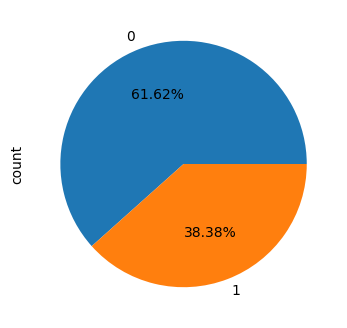

In [104]:
fig = plt.figure(figsize=(4,4))
train_titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

<Axes: ylabel='count'>

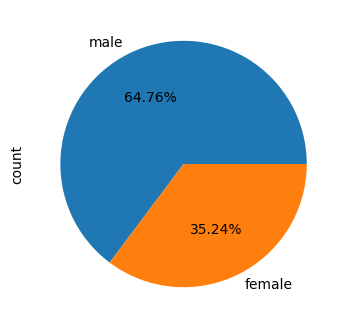

In [105]:
fig = plt.figure(figsize=(4,4))
train_titanic['Sex'].value_counts().plot.pie(autopct = '%1.2f%%')

<Axes: xlabel='Survived', ylabel='count'>

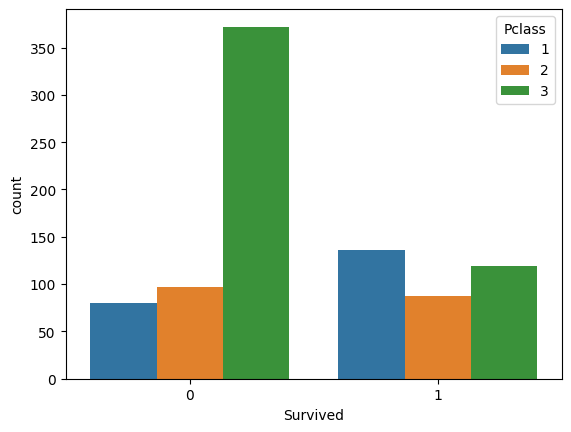

In [106]:
sns.countplot(x=train_titanic.Survived, data=train_titanic, hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

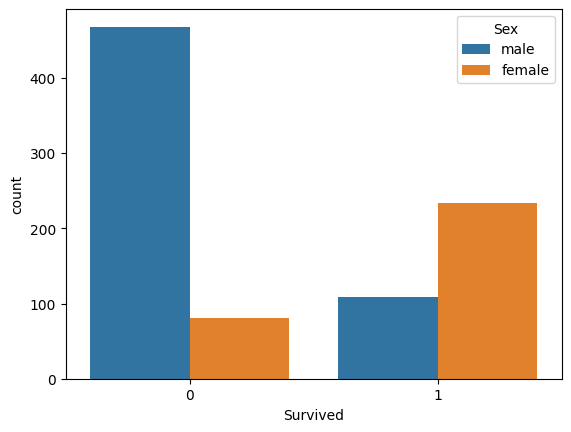

In [107]:
sns.countplot(x=train_titanic.Survived, data=train_titanic, hue="Sex")

### 4. CLEAN & WRANGLE DATA

##### 4.1. Drop Columns & Fill Missing Values
1. Will drop columns ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'] from both training & test data sets. Their 'Cabin' number may have been an important factor for survival (because cabins located closer to the top deck of the ship may have played a favourable role in them getting onto the lifeboats more quickly before the ship sank. However, with over a thousand missing values in that column, a meaningful analysis or correlation won't be possible)
2. Fill missing value in 'Age' column median age 27.5 (median age in training is 28, in test is 27, so overall median is 27.5)


In [108]:
train_titanic = train_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)
test_titanic = test_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

In [109]:
train_titanic.fillna(value = 27.5, inplace = True)
test_titanic.fillna(value = 27.5, inplace = True)

In [110]:
test_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

##### 4.2. Correlation Matrix & Heat Map

In [111]:
corr_mat = train_titanic.corr(method='pearson', min_periods=1, numeric_only=True)
corr_mat

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.063439,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.342236,0.083081,0.018443
Age,-0.063439,-0.342236,1.000000,-0.233373,-0.170423
SibSp,-0.035322,0.083081,-0.233373,1.000000,0.414838
Parch,0.081629,0.018443,-0.170423,0.414838,1.000000


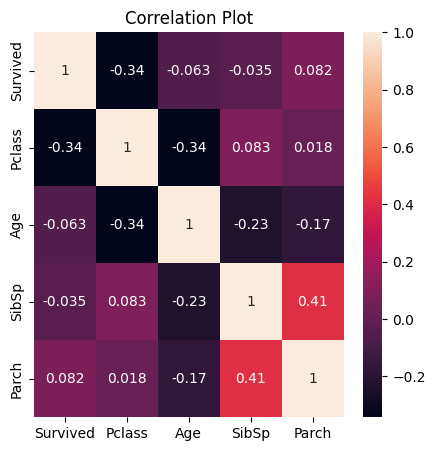

In [112]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, annot= True)
plt.title('Correlation Plot')
plt.show()

##### 4.3. Manually replace categorical values in 'Sex' column with Boolean

In [113]:
genders = {"male": 0, "female": 1}
data = [train_titanic, test_titanic]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

##### 4.4. Manually split train & tests sets into x & y sets

In [114]:
x_train = train_titanic.drop('Survived', axis=1)
y_train = train_titanic['Survived']

x_test = test_titanic.drop('Survived', axis=1)
y_test = test_titanic['Survived']

##### 4.5. Perform Normalisation 

In [115]:
n_scaler = MinMaxScaler()
x_train = n_scaler.fit_transform(x_train)

### 5. BUILD MACHINE LEARNING MODELS & MAKE PREDICTIONS

##### 5.1. Logistic Regression Model
1. Build Logistic Regression Model
2. Fit model
3. Make predictions
4. Check with Confusion Matrix & Accuracy Score
5. Compare 'Actual' & 'Predicted' Values

In [116]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [117]:
y_pred = log_reg.predict(x_test)
y_pred

/Users/selinabeaugrand/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [152,   0]])

In [119]:
lr_score = log_reg.score(x_test, y_test)
lr_score

/Users/selinabeaugrand/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.6363636363636364

In [120]:
pred = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred

,Actual Value,Predicted Value
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,0
415,0,0
416,0,0


##### 5.2. Random Forest Regressor Model
1. Build Random Forest Regressor Model
2. Fit model
3. Make predictions
4. Check Accuracy Score
5. Compare 'Actual' & 'Predicted' values

In [121]:
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [122]:
y_pred1 = RFR.predict(x_test)

/Users/selinabeaugrand/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [123]:
pred1 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred1})
pred1

,Actual Value,Predicted Value
0,0,0.00
1,1,0.56
2,0,0.00
3,0,0.00
4,1,0.31
...,...,...
413,0,0.00
414,1,0.63
415,0,0.00
416,0,0.00


In [124]:
rfr_score = RFR.score(x_test, y_test)
rfr_score

/Users/selinabeaugrand/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.5965628941484742

##### 5.3. Decision Tree Model
1. Build Decision Tree Model
2. Fit model
3. Make predictions
4. Check Accuracy Score
5. Compare 'Actual' & 'Predicted' values

In [125]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train) 

DecisionTreeClassifier()

In [126]:
dr_score = decision_tree.score(x_test, y_test)
dr_score

/Users/selinabeaugrand/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9210526315789473

### 6. EVALUATE THE MODELS

In [127]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest Regressor', 
              'Decision Tree'],
    'Score': [lr_score, rfr_score, dr_score]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
0.921053,Decision Tree
0.636364,Logistic Regression
0.596563,Random Forest Regressor


### CONCLUSION

With an accuracy score of 0.92, the Decision Tree Model fares best in predicting the survival of passngers onboard the Titanic.<br>
<br>One would normally have assumed that the age and sex of the survivors might have played a significant, if not deciding factor in determining who survived and who didn't. However, the reality was vastly different, as the above analysis of our datasets show. There was, in fact, a considerably higher proportion of women and children who survived than men. Those with siblings or spouses on board also has a significantly higher rate of survival. From first-hand accounts of survivors, we know that women and children were the first to be offered a place on the lifeboats soon after the Titanic had struck the iceberg. This would explain the strong correleations.<br>
<br>An interesting and unxpected correlation was that between the ticket class of the passsenger and their survival, with the group of upper/First Class ticket holders having a significantly higher percentage of survivors than the group of passengers who had the lowest Third Class tickets (62% of First Class ticket holders survived by comparison to only 38% of those with Third Class tickets). This can, in part, be explained by the fact that the First Class ticket holders would normally have been staying at cabins on the upper two decks of the ship, meaning they had an easier and quicker access to the lifeboats than those who held Third Class tickets and who were staying in cabins on the lower decks of the ship.<br> 
<br>However, this is not the only reason for the strong correlation between the ticket and a passenger's chance of survival. First-hand wittness accounts tell us that the lifeboats were launched from the First Class decks first and the Second Class decks second. And that there were no decks or lifeboats dedicated to the Third Class.<br>
<br>Finally, although the ship did indeed have lifeboats in case of emergency, there weren't enough of them. Some estimate that there were enough of them to rescue only 50% of those on board.<br>
<br>It is perhaps due to the RMS Titanic's widespread reputation for being virtually unsinkable at the time she sailed, that those who designed and managed her found it inconceivable to even contemplate the possibility that a day would soon come where they would need enough lifeboats to rescue all those on board -- an assumption that not only ended in tragedy, but also etched her on public memory ever since.